<a href="https://colab.research.google.com/github/restrepo/udea.ipynb/blob/main/udea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REST-API example impactu

In [1]:
!pip install unidecode

In [2]:
import pandas as pd
import requests
import json
from IPython.display import JSON
from unidecode import unidecode
def flatten(xss):
    return [x for xs in xss for x in xs]

Obtain "Uiversidad de Antioquia" works

In [5]:
import pandas as pd
import requests
#%%time
DJ = []
total = 107122
#total = 965
page_ini = 1
max_page = 250
extra_page = 0
if total%max_page != 0:
    extra_page = 1
page_end = total//max_page + extra_page
for p in range(page_ini,page_end+1):
    url = f'https://api.impactu.colav.co/affiliation/institution/03bp5hc83/research/products?max={max_page}&page={p}'
    #url = f'https://api.impactu.colav.co/search/works?max={max_page}&page={p}&status=diamond&subjects=1_Library+science'
    dj = requests.get(url)
    if dj.status_code == 200:
        print(p,end="\r")
        jl = dj.json()['data']
        for d in jl:
            kk = d.pop('abstracts')
        i = 0
        for d in jl:
            if len(jl[i]['authors']) > 100000: #10
                kk = jl.pop(i)
            else:
                i += 1


        DJ = DJ +  jl

In [ ]:
len(DJ) # → 104258

107250

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd "/content/drive/Shareddrives/Colav/7.Datos/ImpactU/Universidad de Antioquia"

/content/drive/Shareddrives/Colav/7.Datos/ImpactU/Universidad de Antioquia


save the list to a JSON file

In [25]:
f = open('udea.json','w')
json.dump(DJ,f)
f.close()

In [26]:
ls -lh udea*.json

-rw------- 1 root root 1.6G Apr 11 15:00 udea.json
-rw------- 1 root root 1.6G Apr 11 14:56 udea_old.json


In [5]:
f = open('udea.json','r')
DJ = json.load(f)
f.close()

## Analysis in pandas

### Authors

In [6]:
df = pd.DataFrame(DJ)

In [7]:
del DJ

In [8]:
df.shape

(107000, 23)

In [9]:
df['authors_udea']=df.authors.apply(lambda L: [d for d in L if str(d).find("'name': 'Universidad de Antioquia'") > -1])

In [ ]:
df['authors_fcen']=df.authors.apply(lambda L: [d for d in L if str(d).find("'name': 'Facultad de Ciencias Exactas y Naturales'") > -1])

search authors

In [ ]:
df[:1]

apc  \
0  {'paid': {}}   

                                                                                                                                                                                                   authors  \
0  [{'affiliations': [{'end_date': -1, 'geo': {'city': 'Toulouse', 'country': 'France', 'country_code': 'FR', 'latitude': 43.595085, 'longitude': 1.416743}, 'id': '03er61e50', 'name': 'Clinique Paste...   

   authors_count bibliographic_info citations  \
0              4                 {}        []   

                                                                                                                                                                                         citations_by_year  \
0  [{'cited_by_count': 1, 'year': 2024}, {'cited_by_count': 1, 'year': 2023}, {'cited_by_count': 1, 'year': 2022}, {'cited_by_count': 2, 'year': 2021}, {'cited_by_count': 1, 'year': 2020}, {'cited_by...   

                         citations_count  date_published  \
0  [{'count': 10, 'source': 'openalex'}]    1.625548e+09   

                            doi  \
0  https://doi.org/10.0000/0000   

                                                                                                                                                                                              external_ids  \
0  [{'id': 'https://openalex.org/W4287469585', 'provenance': 'openalex', 'source': 'openalex'}, {'id': 'https://doi.org/10.0000/0000', 'provenance': 'openalex', 'source': 'doi'}, {'id': '0000215856-1...   

   ...  \
0  ...   

                                                                                                                                                                                                     types  \
0  [{'provenance': 'openalex', 'source': 'openalex', 'type': 'preprint'}, {'provenance': 'openalex', 'source': 'crossref', 'type': 'journal-article'}, {'code': '111', 'level': 2, 'provenance': 'scien...   

                                                                                                                                                                             updated  \
0  [{'source': 'openalex', 'time': 1740297049}, {'source': 'scienti', 'time': 1740344705}, {'source': 'scienti', 'time': 1740354001}, {'source': 'minciencias', 'time': 1740365754}]   

  year_published                        provenance  \
0         2021.0  {scienti, minciencias, openalex}   

                                                                                                                                                  type  \
0  {Artículo, Nuevo conocimiento, Publicado en revista especializada, Producción bibliográfica, journal-article, Artículos de investigación, preprint}   

              level_0_scienti level_1_scienti  \
0  {Producción bibliográfica}      {Artículo}   

                        level_2_scienti   level_0_minciencias  \
0  {Publicado en revista especializada}  {Nuevo conocimiento}   

            level_1_minciencias  
0  {Artículos de investigación}  

[1 rows x 30 columns]

In [ ]:
full_name = 'diego alejandro restrepo quintero'
#full_name = 'carlos alberto duque echeverri'
dfa = df[df.authors.apply(lambda L: any([True for d in L if unidecode(str(d.get('full_name')).lower()) == full_name ]))]

Check the json:

In [ ]:
#JSON(dfa.authors.iloc[0])

De conformidad  con lo dispuesto en el Acuerdo Superior 083 del 22 de julio de 1996 (Estatuto profesoral) la carrera docente de la institución se compone  de las categorías de profesor auxiliar, profesor asistente, profesor asociado y profesor titular.

In [ ]:
#JSON(df.authors.iloc[80049])

remove not scienti authors...

In [ ]:
df['scienti_authors'] = df.authors.apply(lambda L: [
                          {'COD_RH':d.get('external_ids')[0].get('id'),
                           'last_names':d.get('last_names'),
                           'first_names':d.get('first_names'),
                           'sex':d.get('sex').lower(),
                           'age':d.get('age'),
                           'affiliations': [{'name': dd.get('name'),
                                             'id': dd.get('id'),
                                             'type': dd.get('types')[0].get('type')
                                            } for dd in d.get('affiliations')],
                           'ranking': [dd for dd in d.get('ranking') if dd.get('source') == 'categoría_laboral' ]
                          } for d in L
                            if d.get('sex') and
                            any([True for dd in d.get('external_ids')
                                 if dd.get('provenance') == 'scienti' and dd.get('source') == 'scienti'])   ])

In [ ]:
L = df['scienti_authors'].to_list()
L = flatten(L)
dfL = pd.DataFrame(L)
del L
dfL.shape

(125924, 7)

In [ ]:
udea = dfL[dfL['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'Education' and d.get('name') == 'Universidad de Antioquia']).apply(len)>0
         ].reset_index(drop=True)

In [ ]:
udea['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'Education']).iloc[0]

['Universidad de Antioquia']

In [ ]:
udea.affiliations.iloc[0]

[{'name': 'Universidad de Antioquia', 'id': '03bp5hc83', 'type': 'Education'},
 {'name': 'Instituto de Biología',
  'id': '03bp5hc83_3_21420003_3513',
  'type': 'department'},
 {'name': 'Facultad de Ciencias Exactas y Naturales',
  'id': '03bp5hc83_3',
  'type': 'faculty'},
 {'name': 'Gebiomic (genética y Bioquímica de Microorganismos)',
  'id': 'COL0014064',
  'type': 'group'}]

In [ ]:
ror = '03bp5hc83'
udea['faculty'] = udea['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'faculty' and d.get('id').find(ror) > -1  ]).apply(lambda L: L  if len(L) > 0 else
                                                ['unknown']).str[0]
udea['department'] = udea['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'department' and d.get('id').find(ror) > -1 ]).apply(lambda L: L  if len(L) > 0 else
                                                ['unknown']).str[0]

udea['group'] = udea['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'group' ]).apply(lambda L: L  if len(L) > 0 else
                                                ['unknown']).str[0]

In [ ]:
udea.shape

(99250, 10)

In [ ]:
udea.drop_duplicates(subset=['COD_RH','sex','age','faculty','department','group']).shape

(2673, 10)

In [ ]:
udea.drop_duplicates(subset=['COD_RH']).shape

(2673, 10)

In [ ]:
udea = udea.drop_duplicates(subset=['COD_RH']).reset_index(drop=True)

In [ ]:
fm = udea['sex'].value_counts()
print(f"{round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")

44.5 % of 2673


In [ ]:
fm = udea['sex'].value_counts()
print(f"UdeA: {round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")
for f in udea.faculty.unique() :
    udea_f = udea[udea['faculty'] == f]
    fm = udea_f['sex'].value_counts()
    if not fm.get('mujer'):
        fm['mujer'] = 0
    if not fm.get('hombre'):
        fm['hombre'] = 0
    print(f"{f}: {round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")
    for ff in  udea_f.department.unique():
        udea_d = udea[ ((udea['faculty'] == f) & (udea['department'] == ff)) ]
        fm = udea_d['sex'].value_counts()
        if not fm.get('mujer'):
            fm['mujer'] = 0
        if not fm.get('hombre'):
            fm['hombre'] = 0
        print(f"   {ff}: {round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")

    #if f == 'Escuela de Microbiología':
    #    break

UdeA: 44.5 % of 2673
Facultad de Ciencias Exactas y Naturales: 25.3 % of 293
   Instituto de Biología: 44.0 % of 75
   Instituto de Química: 26.2 % of 80
   Instituto de Física: 11.5 % of 78
   unknown: 33.3 % of 3
   Departamento de Matemáticas: 16.7 % of 54
   Programa Ingeniería Civil: 0.0 % of 1
   Programa Regionalización Urabá: 50.0 % of 2
Facultad de Medicina: 43.9 % of 478
   Departamento de Cirugía: 23.7 % of 59
   Departamento de Pediatría y Puericultura: 53.4 % of 73
   Departamento de Farmacología y Toxicología: 50.0 % of 22
   Departamento de Microbiología y Parasitología: 56.1 % of 57
   Departamento de Medicina Interna: 29.9 % of 77
   Instituto de Investigaciones Médicas: 46.2 % of 39
   Centro de Investigaciones Médicas: 57.1 % of 7
   Departamento de Fisiología: 40.7 % of 27
   Departamento de Siquiatría y Ciencias del Comportamiento Humano: 29.4 % of 17
   Departamento de Morfología: 37.5 % of 8
   Departamento de Bioquímica: 33.3 % of 3
   Departamento de Obstetrici

In [ ]:
for r in [ 'AUXILIAR' , 'ASISTENTE','ASOCIADO','TITULAR']:
    fm = udea[udea['ranking'].apply(lambda L: r in [d.get('rank') for d in L])]['sex'].value_counts()
    print(f"{r}: {round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")

AUXILIAR: 46.5 % of 1291
ASISTENTE: 46.7 % of 1983
ASOCIADO: 43.2 % of 1187
TITULAR: 41.3 % of 809


In [ ]:
f = 'Facultad de Ciencias Exactas y Naturales'
ff = 'Instituto de Física'
udea_f = udea[ ((udea['faculty'] == f)) ]
udea_d = udea[ ((udea['faculty'] == f) & (udea['department'] == ff)) ]

In [ ]:
for r in [ 'AUXILIAR' , 'ASISTENTE','ASOCIADO','TITULAR']:
    fm = udea_f[udea_f['ranking'].apply(lambda L: r in [d.get('rank') for d in L])]['sex'].value_counts()
    print(f"{r}: {round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")

AUXILIAR: 25.5 % of 110
ASISTENTE: 26.4 % of 208
ASOCIADO: 21.4 % of 126
TITULAR: 20.0 % of 95


In [ ]:
for r in [ 'AUXILIAR' , 'ASISTENTE','ASOCIADO','TITULAR']:
    fm = udea_d[udea_d['ranking'].apply(lambda L: r in [d.get('rank') for d in L])]['sex'].value_counts()
    print(f"{r}: {round(fm['mujer']/(fm['mujer']+fm['hombre'])*100,1)} % of {fm['mujer']+fm['hombre']}")

AUXILIAR: 12.0 % of 25
ASISTENTE: 11.1 % of 54
ASOCIADO: 3.1 % of 32
TITULAR: 3.6 % of 28


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
udea[udea['age'] < 0]

COD_RH         last_names       first_names     sex   age  \
83  0000045640  [Pineda, Salazar]  [David, Antonio]  hombre -27.0   

                                         affiliations  \
83  [{'name': 'Universidad de Antioquia', 'id': '0...   

                                              ranking               faculty  \
83  [{'date': 779432400, 'rank': 'TITULAR', 'sourc...  Facultad de Medicina   

                          department                             group  
83  Departamento de Medicina Interna  Grupo Neuropsicología y Conducta

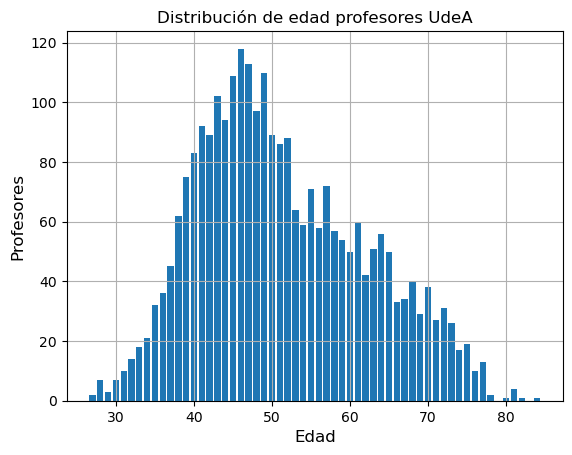

In [ ]:
kk = udea[udea['age'] > 0]['age'].sort_values().dropna().astype(int).value_counts()

age = pd.DataFrame()

age['age'] = kk.keys()

age['counts'] = kk.values

age = age.sort_values('age')

plt.bar(age['age'],age['counts'])
plt.xlabel('Edad', size = 12)
plt.ylabel('Profesores', size = 12)
plt.title('Distribución de edad profesores UdeA')
plt.grid()

In [ ]:
f = 'Facultad de Ciencias Exactas y Naturales'
ff = 'Instituto de Física'
udea_f = udea[ ((udea['faculty'] == f)) ]
udea_d = udea[ ((udea['faculty'] == f) & (udea['department'] == ff)) ]

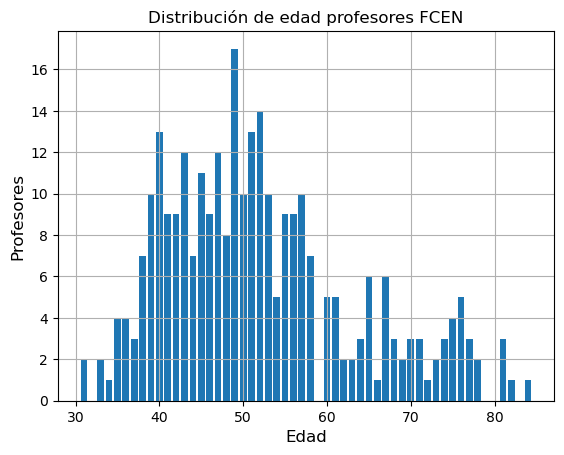

In [ ]:
kk = udea_f['age'].sort_values().dropna().astype(int).value_counts()

age = pd.DataFrame()

age['age'] = kk.keys()

age['counts'] = kk.values

age = age.sort_values('age')

plt.bar(age['age'],age['counts'])
plt.xlabel('Edad', size = 12)
plt.ylabel('Profesores', size = 12)
plt.title('Distribución de edad profesores FCEN')
plt.grid()

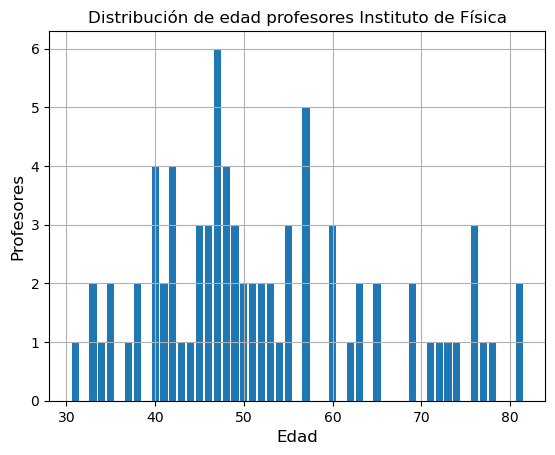

In [ ]:
kk = udea_d['age'].sort_values().dropna().astype(int).value_counts()

age = pd.DataFrame()

age['age'] = kk.keys()

age['counts'] = kk.values

age = age.sort_values('age')

plt.bar(age['age'],age['counts'])
plt.xlabel('Edad', size = 12)
plt.ylabel('Profesores', size = 12)
plt.title('Distribución de edad profesores Instituto de Física')
plt.grid()

In [ ]:
y = 2020
dfy = df[df.year_published == y]

In [ ]:
    L = dfy['scienti_authors'].to_list()
    L = flatten(L)

    dfL = pd.DataFrame(L)

In [ ]:
dfL.shape

(7295, 7)

In [ ]:
dfL.drop_duplicates('COD_RH').shape

(2453, 7)

In [ ]:
df.shape

(104258, 24)

In [ ]:
CHECK_OPENALEX = False # Count larger that OpenAlex is expected
if CHECK_OPENALEX:
    df = df[df['types'].apply(lambda L: any([True for d in L
                                         if d.get('source') == 'openalex' #or
                                             #d.get('type') == 'Artículo'
                                        ]))].reset_index(drop = True)

In [ ]:
# df = df[df['types'].apply(lambda L: 'openalex' not in [d.get('source') for d in L])]
# df = df[df['types'].apply(lambda L: 'Artículo' not in [d.get('type') for d in L])].reset_index(drop=True)

In [ ]:
df.shape

(104258, 24)

In [ ]:
df['openalex'] = df['external_ids'].apply(lambda L: [d.get('id') for d in L if d.get('source') == 'openalex']).str[0]

In [ ]:
df.drop_duplicates(subset=['openalex']).shape

(47912, 25)

In [ ]:
FACULTY = False
DEPARTMENT = False
UDEA = pd.DataFrame()
w = []
for y in [y for y in set(df.year_published.fillna(0).astype(int)) if y > 0]:
    dfy = df[df.year_published == y]
    if dfy.empty:
        continue
    L = dfy['scienti_authors'].to_list()
    L = flatten(L)
    if not L:
        continue
    dfL = pd.DataFrame(L)
    del L

    # Filter pure UdeA authors
    udeay = dfL[dfL['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'Education' and d.get('name') == 'Universidad de Antioquia']).apply(len)>0
         ].reset_index(drop=True)

    udeay['faculty'] = udeay['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'faculty' and d.get('id').find(ror) > -1  ]).apply(lambda L: L  if len(L) > 0 else
                                                ['unknown']).str[0]
    udeay['department'] = udeay['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'department' and d.get('id').find(ror) > -1 ]).apply(lambda L: L  if len(L) > 0 else
                                                ['unknown']).str[0]
    udeay['group'] = udeay['affiliations'].apply(lambda L: [d.get('name') for d in L
         if d.get('type') == 'group' ]).apply(lambda L: L  if len(L) > 0 else
                                                ['unknown']).str[0]
    udeay = udeay.drop_duplicates(subset=['COD_RH']).reset_index(drop=True)

    udeay['year'] = y
    UDEA = pd.concat((UDEA,udeay))

    if FACULTY:
        f = 'Facultad de Ciencias Exactas y Naturales'
        udeay = udeay[ ((udeay['faculty'] == f)) ]
    if DEPARTMENT:
        ff = 'Instituto de Física'
        udeay = udeay[ ((udeay['faculty'] == f) & (udeay['department'] == ff)) ]

    #.drop_duplicates(subset=['COD_RH']).reset_index(drop=True)

    d = {}
    d['year'] = y
    d['works'] = dfy.shape[0]
    d['hombre'] = udeay[udeay['sex'] == 'hombre'].shape[0]
    d['mujer'] = udeay[udeay['sex'] == 'mujer'].shape[0]
    d['authors'] = d['hombre'] + d['mujer']
    w.append(d)

Text(0, 0.5, 'works')

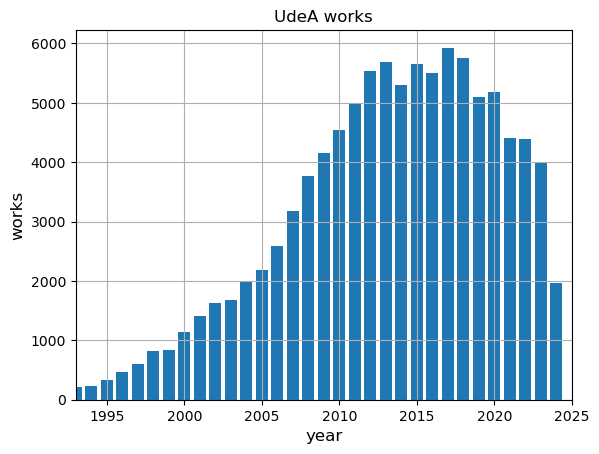

In [ ]:
dw = pd.DataFrame(w).sort_values('year')
dw['f/m'] = round(dw['mujer']/dw['authors'],4)

plt.bar(dw['year'],dw['works'])
plt.xlim(1993,2025)
plt.grid()
plt.title('UdeA works')
plt.xlabel('year',size = 12)
plt.ylabel('works',size = 12)

Text(0, 0.5, 'professors')

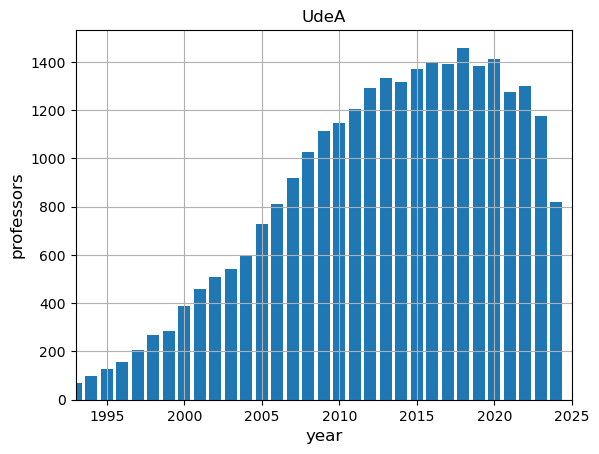

In [ ]:
plt.bar(dw['year'],dw['authors'])
plt.xlim(1993,2025)
plt.grid()
plt.title('UdeA')
if FACULTY:
    plt.title(f)
if DEPARTMENT:
    plt.title(ff)

plt.xlabel('year',size = 12)
plt.ylabel('professors',size = 12)

Text(0, 0.5, 'female ratio')

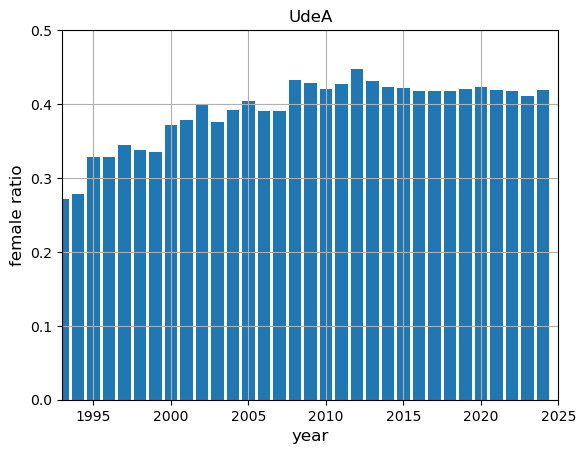

In [ ]:
plt.bar(dw['year'],dw['f/m'])
plt.xlim(1993,2025)
plt.grid()
plt.ylim(0,0.5)
if DEPARTMENT:
    plt.xlim(2002,2025)
    plt.ylim(0,0.1)

plt.title('UdeA')
if FACULTY:
    plt.title(f)
if DEPARTMENT:
    plt.title(ff)

plt.xlabel('year',size = 12)
plt.ylabel('female ratio',size = 12)

In [ ]:
UDEA['full_name']=UDEA.first_names.apply(' '.join)+' '+UDEA.last_names.apply(' '.join)

In [ ]:
y1 = 2020
y2 = 2023
udea_diff = pd.DataFrame({'COD_RH' : list(set(UDEA[UDEA['year']==y1].COD_RH).difference(UDEA[UDEA['year']==y2].COD_RH))})

In [ ]:
udea_diff = udea_diff.merge(UDEA.drop_duplicates('COD_RH')[['COD_RH','full_name','faculty','department']],
                on='COD_RH',how='left')

In [ ]:
udea_diff.shape

(497, 4)

In [ ]:
dw[-5:-3]

year  works  hombre  mujer  authors     f/m
60  2020   5177     815    596     1411  0.4224
61  2021   4401     741    533     1274  0.4184

In [ ]:
print(f'Authors which publish in {y1} but not in {y2}:')
#print(f'in {f}')
#udea_diff[udea_diff['faculty'] == f].reset_index(drop=True)
print(f'in {ff}')
udea_diff[udea_diff['department'] == ff].reset_index(drop=True)

Authors which publish in 2020 but not in 2023:
in Instituto de Física


COD_RH                         full_name  \
0   0000104647        Jaime Alberto Osorio Velez   
1   0000320714            German Ricaurte Avella   
2   0001581561                  Viktor Tulupenko   
3   0001557239                Eduardo Rojas Pena   
4   0000348090           Alvaro Herrera Carrillo   
5   0000731145     Pablo Andres Cuartas Restrepo   
6   0000196878   Fabiola del Socorro Gomez Gomez   
7   0001605958                  Volodymyr Akimov   
8   0000247871         Edgar Alberto Rueda Munoz   
9   0000036897         Jorge Enrique Tobon Gomez   
10  0001493220      Ignacio Ramon Ferrin Vazquez   
11  0000167991         Jorge Hernan Lopez Botero   
12  0001405606           Sorayda Trejos Gonzalez   
13  0000057649       Jorge Eduardo Mahecha Gomez   
14  0001201360       Andres Felipe Rivera Romero   
15  0000037192   Daniel Esteban Jaramillo Arango   
16  0000000639  Gloria Eugenia Campillo Figueroa   

                                     faculty           department  
0   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
1   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
2   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
3   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
4   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
5   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
6   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
7   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
8   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
9   Facultad de Ciencias Exactas y Naturales  Instituto de Física  
10  Facultad de Ciencias Exactas y Naturales  Instituto de Física  
11  Facultad de Ciencias Exactas y Naturales  Instituto de Física  
12  Facultad de Ciencias Exactas y Naturales  Instituto de Física  
13  Facultad de Ciencias Exactas y Naturales  Instituto de Física  
14  Facultad de Ciencias Exactas y Naturales  Instituto de Física  
15  Facultad de Ciencias Exactas y Naturales  Instituto de Física  
16  Facultad de Ciencias Exactas y Naturales  Instituto de Física

### Types

In [ ]:
df = pd.DataFrame(DJ)

In [ ]:
del DJ

In [ ]:
tp = pd.DataFrame(flatten(df['types'].to_list())).drop_duplicates().sort_values(['provenance','source'] )
tp[:3]

provenance source                         type code  level
188587      ciarp  ciarp  Capitulo de libro de ensayo  NaN    NaN
188591      ciarp  ciarp        Impreso universitario  NaN    NaN
188592      ciarp  ciarp  Articulo en revista Tipo A2  NaN    NaN

In [ ]:
tp = tp.reset_index(drop=True)
tp['level'] = tp['level'].fillna(0).astype(int)
tp['code'] = tp['code'].fillna(0).astype(str)

In [ ]:
p = 'minciencias'
s = 'minciencias'
t = 'Artículos'

In [ ]:
2 in {1,2}

True

In [ ]:
df['provenance'] = df['types'].apply(lambda L: set([d.get('provenance') for d in L]))
df['source'] = df['types'].apply(lambda L: set([d.get('source') for d in L]))
df['type'] = df['types'].apply(lambda L: set([d.get('type') for d in L]))

In [ ]:
c = []
for p,s,t in tp[['provenance','source','type']].values:
    c.append( df[((df['provenance'].apply(lambda L: p in L) ) &
        (df['source'].apply(lambda L: s in L)) &
        (df['type'].apply(lambda L: t in L))
       )].shape[0])

In [ ]:
tp['counts'] = c

In [ ]:
tp.sort_values('counts', ascending=False)[:50]

provenance       source  \
113      scienti      scienti   
89      openalex     openalex   
70      openalex     crossref   
112      scienti      scienti   
143      scienti      scienti   
122      scienti      scienti   
111      scienti      scienti   
104      scholar      scholar   
49   minciencias  minciencias   
135      scienti      scienti   
48   minciencias  minciencias   
55   minciencias  minciencias   
119      scienti      scienti   
147      scienti      scienti   
121      scienti      scienti   
56   minciencias  minciencias   
51   minciencias  minciencias   
50   minciencias  minciencias   
120      scienti      scienti   
126      scienti      scienti   
54   minciencias  minciencias   
118      scienti      scienti   
125      scienti      scienti   
131      scienti      scienti   
114      scienti      scienti   
123      scienti      scienti   
136      scienti      scienti   
52   minciencias  minciencias   
115      scienti      scienti   
117      scienti      scienti   
145      scienti      scienti   
128      scienti      scienti   
146      scienti      scienti   
127      scienti      scienti   
149      scienti      scienti   
116      scienti      scienti   
133      scienti      scienti   
62   minciencias  minciencias   
57   minciencias  minciencias   
105      scholar      scholar   
139      scienti      scienti   
90      openalex     openalex   
58   minciencias  minciencias   
97      openalex     openalex   
77      openalex     crossref   
53   minciencias  minciencias   
65   minciencias  minciencias   
60   minciencias  minciencias   
76      openalex     crossref   
78      openalex     crossref   

                                                  type code  level  counts  
113                           Producción bibliográfica    1      0   51832  
89                                             article    0      0   45187  
70                                     journal-article    0      0   44126  
112                                           Artículo   11      1   33482  
143                                           Artículo  1A1      2   33482  
122                        Trabajos dirigidos/Tutorías    6      0   31688  
111                 Publicado en revista especializada  111      2   30214  
104                                            article    0      0   24895  
49                                  Nuevo conocimiento    0      0   18184  
135                      Trabajos de grado de pregrado   64      1   16151  
48                          Artículos de investigación    0      1   13498  
55                         Formación de recurso humano    0      0   12142  
119                                              Libro   13      1   10953  
147                                              Libro  1A2      2   10953  
121  Trabajo de grado de maestría o especialidad cl...   62      1    9347  
56                                   Tesis de pregrado    0      1    7195  
51                 Apropiación social del conocimiento    0      0    5891  
50                                           Artículos    0      1    5625  
120                   Otro capítulo de libro publicado  135      2    4547  
126                            Otro artículo publicado   14      1    4179  
54                                   Tesis de maestria    0      1    4133  
118                                  Capítulo de libro  132      2    3612  
125                             Revista de divulgación  142      2    2944  
131                                 Tesis de doctorado   61      1    2394  
114                                    Corto (Resumen)  112      2    1969  
123                   Libro resultado de investigación  134      2    1857  
136               Documento de trabajo (Working Paper)   1D      1    1784  
52                                  Capítulos de libro    0      1    1782  
115                                  Revisión (Survey)  113      2    1724  
117         

In [ ]:
tp[tp['provenance'] == 'minciencias'].sort_values('counts', ascending=False)

provenance       source  \
49  minciencias  minciencias   
48  minciencias  minciencias   
55  minciencias  minciencias   
56  minciencias  minciencias   
51  minciencias  minciencias   
50  minciencias  minciencias   
54  minciencias  minciencias   
52  minciencias  minciencias   
62  minciencias  minciencias   
57  minciencias  minciencias   
58  minciencias  minciencias   
53  minciencias  minciencias   
65  minciencias  minciencias   
60  minciencias  minciencias   
59  minciencias  minciencias   
63  minciencias  minciencias   
69  minciencias  minciencias   
68  minciencias  minciencias   
64  minciencias  minciencias   
67  minciencias  minciencias   
61  minciencias  minciencias   
66  minciencias  minciencias   

                                                 type code  level  counts  
49                                 Nuevo conocimiento    0      0   18184  
48                         Artículos de investigación    0      1   13498  
55                        Formación de recurso humano    0      0   12142  
56                                  Tesis de pregrado    0      1    7195  
51                Apropiación social del conocimiento    0      0    5891  
50                                          Artículos    0      1    5625  
54                                  Tesis de maestria    0      1    4133  
52                                 Capítulos de libro    0      1    1782  
62                     Informe Final de Investigación    0      1    1096  
57  Apropiación social del conocimiento y divulgac...    0      0    1093  
58                                             Libros    0      1     918  
53                Capítulos de libro de investigación    0      1     867  
65                                 Tesis de doctorado    0      1     844  
60                               Documento de trabajo    0      1     818  
59                            Libros de investigación    0      1     301  
63  Boletín divulgativo de resultado de investigación    0      1     146  
69                              Informe técnico final    0      1      97  
68                Desarrollo tecnológico e innovación    0      0      82  
64        Publicaciones editoriales no especializadas    0      1      43  
67                    Generación de contenido impresa    0      1      33  
61                                   Notas científica    0      1      13  
66  Libros de Divulgación de investigación y/o Com...    0      1      13

Scienti with different `level = 1`

In [ ]:
df['level_0_scienti'] = df['types'].apply(
    lambda L: set([d.get('type') for d in L if d.get('provenance') == 'scienti' and d.get('level') == 0
              ]))
df['level_1_scienti'] = df['types'].apply(
    lambda L: set([d.get('type') for d in L if d.get('provenance') == 'scienti' and d.get('level') == 1
              ]))

df['level_2_scienti'] = df['types'].apply(
    lambda L: set([d.get('type') for d in L if d.get('provenance') == 'scienti' and d.get('level') == 2
              ]))

In [ ]:
df['level_0_minciencias'] = df['types'].apply(
    lambda L: set([d.get('type') for d in L if d.get('provenance') == 'minciencias' and d.get('level') == 0
              ]))
df['level_1_minciencias'] = df['types'].apply(
    lambda L: set([d.get('type') for d in L if d.get('provenance') == 'minciencias' and d.get('level') == 1
              ]))

In [ ]:
df['level_0_scienti']

0         {Producción bibliográfica}
1                                 {}
2         {Producción bibliográfica}
3                                 {}
4         {Producción bibliográfica}
                     ...            
104253                            {}
104254                            {}
104255                            {}
104256                            {}
104257                            {}
Name: level_0_scienti, Length: 104258, dtype: object

In [ ]:
df.columns

Index(['apc', 'authors', 'authors_count', 'bibliographic_info', 'citations',
       'citations_by_year', 'citations_count', 'date_published', 'doi',
       'external_ids', 'external_urls', 'groups', 'id', 'keywords',
       'open_access', 'ranking', 'references', 'source', 'subjects', 'titles',
       'types', 'updated', 'year_published', 'provenance', 'type',
       'level_0_scienti', 'level_1_scienti', 'level_2_scienti',
       'level_0_minciencias', 'level_1_minciencias'],
      dtype='object')

products with different scienti `level:0` → different products

In [ ]:
df[ df['level_0_scienti'].apply(len) > 1]#[['level_1_scienti','external_ids']].sample().iloc[0].to_dict()

Empty DataFrame
Columns: [apc, authors, authors_count, bibliographic_info, citations, citations_by_year, citations_count, date_published, doi, external_ids, external_urls, groups, id, keywords, open_access, ranking, references, source, subjects, titles, types, updated, year_published, provenance, type, level_0_scienti, level_1_scienti, level_2_scienti, level_0_minciencias, level_1_minciencias]
Index: []

[0 rows x 30 columns]

products with different scienti `level:1` → same product in each case

In [ ]:
df[ df['level_1_scienti'].apply(len) > 1][['level_0_minciencias','level_0_scienti','level_1_scienti','external_ids']].sample().iloc[0].to_dict()

{'level_0_minciencias': {'Nuevo conocimiento'},
 'level_0_scienti': {'Producción bibliográfica'},
 'level_1_scienti': {'Artículo', 'Trabajos en eventos (Capítulos de memoria)'},
 'external_ids': [{'id': '0000145858-130',
   'provenance': 'scienti',
   'source': 'scienti'},
  {'id': '0000145858-130', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '0000177300-142', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '0000772917-16', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '104468-0000145858-1740359878',
   'provenance': 'ciarp',
   'source': 'ciarp'},
  {'id': 'ART-0000145858-130',
   'provenance': 'minciencias',
   'source': 'minciencias'},
  {'id': '0000145858-130', 'provenance': 'minciencias', 'source': 'scienti'}]}

products with different scienti `level:2` → same product in each case

In [ ]:
kk = df[ df['level_2_scienti'].apply(len) > 1]#
kk[['level_0_scienti','level_1_scienti','level_2_scienti','external_ids']].sample().iloc[0].to_dict()

{'level_0_scienti': {'Producción bibliográfica'},
 'level_1_scienti': {'Artículo'},
 'level_2_scienti': {'Publicado en revista especializada',
  'Revisión (Survey)'},
 'external_ids': [{'id': 'https://openalex.org/W2376394569',
   'provenance': 'openalex',
   'source': 'openalex'},
  {'id': 'https://doi.org/10.17230/ingciencia.12.23.9',
   'provenance': 'openalex',
   'source': 'doi'},
  {'id': 2376394569, 'provenance': 'openalex', 'source': 'mag'},
  {'id': '0000526762-35', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': 'https://doi.org/10.17230/ingciencia.12.23.9',
   'provenance': 'scienti',
   'source': 'doi'},
  {'id': '0001348609-45', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '8yyE0fWfvmIJ', 'provenance': 'scholar', 'source': 'scholar'},
  {'id': '0001498201-3', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '14398-31642512-1740359297',
   'provenance': 'ciarp',
   'source': 'ciarp'},
  {'id': '14540-98666408-1740359297',
   'provenance': 'ciarp',


In [ ]:
import re

In [ ]:
re.search('^Libro','A Libro')

In [ ]:
kkk = kk[kk['level_2_scienti'].apply(
    lambda L: [x for x in L if re.search('^Libro',x)]).apply(len) > 0
                       ]
kkk[kkk['level_2_scienti'].apply(lambda L: [x for x in L if re.search('Capítulo',x)]).apply(len) > 0
    ][['level_0_scienti','level_1_scienti','level_2_scienti','external_ids']].sample().iloc[0].to_dict()

{'level_0_scienti': {'Producción bibliográfica'},
 'level_1_scienti': {'Libro'},
 'level_2_scienti': {'Capítulo de libro',
  'Libro pedagógico y/o de divulgación',
  'Otro capítulo de libro publicado'},
 'external_ids': [{'id': '0000030147-39',
   'provenance': 'scienti',
   'source': 'scienti'},
  {'id': '0000030147-39', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '0000033413-18924', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '0000826340-26', 'provenance': 'scienti', 'source': 'scienti'},
  {'id': '23523-76320071-1740359297',
   'provenance': 'ciarp',
   'source': 'ciarp'}]}

In [ ]:
pd.set_option('display.max_colwidth',200)

In [ ]:
df[df['level_0_minciencias'].apply(len) > 0][['level_0_minciencias','level_1_minciencias','level_0_scienti','level_1_scienti','level_2_scienti'
                                             ]].astype(str).drop_duplicates(['level_1_minciencias','level_1_scienti']).sort_values('level_1_minciencias')[:50]

level_0_minciencias  \
0                                                           {'Nuevo conocimiento'}   
31941                                                       {'Nuevo conocimiento'}   
2581                                                        {'Nuevo conocimiento'}   
2917                                                        {'Nuevo conocimiento'}   
3534                                                        {'Nuevo conocimiento'}   
70884                                                       {'Nuevo conocimiento'}   
30327                                                       {'Nuevo conocimiento'}   
5404                                                        {'Nuevo conocimiento'}   
30303                                                       {'Nuevo conocimiento'}   
7850                                                        {'Nuevo conocimiento'}   
26004                                                       {'Nuevo conocimiento'}   
47584                                                       {'Nuevo conocimiento'}   
9606                                                        {'Nuevo conocimiento'}   
49301                                                       {'Nuevo conocimiento'}   
11654                                                       {'Nuevo conocimiento'}   
61328                                                       {'Nuevo conocimiento'}   
13213                                                       {'Nuevo conocimiento'}   
24930                                                       {'Nuevo conocimiento'}   
14692                                                       {'Nuevo conocimiento'}   
15577                                                       {'Nuevo conocimiento'}   
22747                                                       {'Nuevo conocimiento'}   
22476                                                       {'Nuevo conocimiento'}   
21930                                                       {'Nuevo conocimiento'}   
51133                                                       {'Nuevo conocimiento'}   
17406                                                       {'Nuevo conocimiento'}   
21909                                                       {'Nuevo conocimiento'}   
50286                                                       {'Nuevo conocimiento'}   
20104                                                       {'Nuevo conocimiento'}   
2213                                                        {'Nuevo conocimiento'}   
35062                                                       {'Nuevo conocimiento'}   
5865                                                        {'Nuevo conocimiento'}   
1273                                                        {'Nuevo conocimiento'}   
11                                                          {'Nuevo conocimiento'}   
346                                                         {'Nuevo conocimiento'}   
383                                                         {'Nuevo conocimiento'}   
41477                                                       {'Nuevo conocimiento'}   
36041                                                       {'Nuevo conocimiento'}   
1047                                                        {'Nuevo conocimiento'}   
35637                                                       {'Nuevo conocimiento'}   
90529                                                       {'Nuevo conocimiento'}   
41657                                                       {'Nuevo conocimiento'}   
14528                                      {'Apropiación social del conocimiento'}   
13182  {'Apropiación social del conocimiento y divulgación pública de la ciencia'}   
12756                                      {'Apropiación social del conocimiento'}   
12228                                      {'Apropiación social del conocimiento'}   
39642                                                       {'Nuevo conocimiento'}   
14792                

In [ ]:
df[['titles','types','external_ids']].iloc[35637].to_dict()

{'titles': [{'lang': 'es',
   'source': 'openalex',
   'title': "Alimentos funcionales. 'Alimentos funcionales'"},
  {'lang': 'es',
   'source': 'scienti',
   'title': 'VIDA ÚTIL FISICOQUÍMICA DE ALIMENTOS FUNCIONALES'},
  {'lang': 'es',
   'provenance': 'ciarp',
   'source': 'ciarp',
   'title': 'ALIMENTOS FUNCIONALES: MITOS Y REALIDADES'},
  {'lang': 'es',
   'source': 'minciencias',
   'title': 'VIDA ÚTIL FISICOQUÍMICA DE ALIMENTOS FUNCIONALES'}],
 'types': [{'provenance': 'openalex', 'source': 'openalex', 'type': 'article'},
  {'provenance': 'openalex', 'source': 'crossref', 'type': 'journal-article'},
  {'code': '113',
   'level': 2,
   'provenance': 'scienti',
   'source': 'scienti',
   'type': 'Revisión (Survey)'},
  {'code': '11',
   'level': 1,
   'provenance': 'scienti',
   'source': 'scienti',
   'type': 'Artículo'},
  {'code': '1',
   'level': 0,
   'provenance': 'scienti',
   'source': 'scienti',
   'type': 'Producción bibliográfica'},
  {'code': '141',
   'level': 2,
   '

In [ ]:
tpu = df[((df['provenance'].apply(lambda L: p in L) ) &
        (df['source'].apply(lambda L: s in L)) &
        (df['type'].apply(lambda L: t in L))
       )][['provenance','source','type']].astype(str).drop_duplicates().reset_index(drop=True)

tpu['provenance'] = tpu['provenance'].apply(eval)

tpu['source'] = tpu['source'].apply(eval)

tpu['type'] = tpu['type'].apply(eval)

In [ ]:
pd.set_option('display.max_colwidth',500)

In [ ]:
#pd.set_option('display.max_rows', 500)

In [ ]:
tpu[:1]

provenance  \
0  {minciencias, openalex, scholar}   

                                       source  \
0  {minciencias, openalex, crossref, scholar}   

                                                                         type  
0  {Artículos, article, reference-entry, Apropiación social del conocimiento}

minciencias → scienti

In [ ]:
kk = df[df['type'].apply(lambda L:'Desarrollo tecnológico e innovación' in L)]
#kk[kk['provenance'].apply(lambda L: 'scienti' in L)][['type','provenance','types']]#.to_dict(orient = 'records')

In [ ]:
kk[kk['provenance'].apply(lambda L: 'scienti' in L)][['level_1_scienti','level_2_scienti']]

level_1_scienti  \
50688                                       {Libro}   
80826  {Trabajos en eventos (Capítulos de memoria)}   
87615    {Trabajos dirigidos/Tutorías de otro tipo}   

                          level_2_scienti  
50688  {Libro resultado de investigación}  
80826                           {Resumen}  
87615                                  {}

In [ ]:
from fuzzywuzzy import fuzz

In [ ]:
fuzz.ratio('Initial Atmospheric Corrosion of Copper Induced by Carboxylic Acids"'.lower(),
           "The Initial Atmospheric Corrosion of Copper and Zinc Induced by Carboxylic Acids".lower())

91

## Citations

In [ ]:
def hIndex(citations):
    """
    https://github.com/kamyu104/LeetCode/blob/master/Python/h-index.py
    :type citations: List[int]
    :rtype: int

    # Given an array of citations (each citation is a non-negative integer)
    # of a researcher, write a function to compute the researcher's h-index.
    #
    # According to the definition of h-index on Wikipedia:
    # "A scientist has index h if h of his/her N papers have
    # at least h citations each, and the other N − h papers have
    # no more than h citations each."
    #
    # For example, given citations = [3, 0, 6, 1, 5],
    # which means the researcher has 5 papers in total
    # and each of them had received 3, 0, 6, 1, 5 citations respectively.
    # Since the researcher has 3 papers with at least 3 citations each and
    # the remaining two with no more than 3 citations each, his h-index is 3.
    #
    # Note: If there are several possible values for h, the maximum one is taken as the h-index.
    """
    import builtins
    sum=builtins.sum
    return sum(x >= i + 1 for i, x in enumerate(sorted(  list(citations), reverse=True)))

In [ ]:
au_column = 'authors_udea'

In [ ]:
dfcen = df[df[au_column].apply(len)>0].reset_index(drop = True)

In [ ]:
afcen = dfcen[au_column].apply(lambda L: [d.get('id') for d in L]).apply(pd.Series).stack().unique()

In [ ]:
len(set(afcen))

19931

In [ ]:
a = afcen[0]

In [ ]:
a

'67c28865c64555ea3e716bb4'

In [ ]:
dafcen = dfcen[dfcen[au_column].astype(str).str.contains(a)].reset_index(drop =True)

In [ ]:
i = 0
Lfcen = []
au_filtered = au_column.split('_')[-1]
for a in afcen:
    dafcen = dfcen[dfcen[au_column].astype(str).str.contains(a)].reset_index(drop =True)
    dafcen[f'author_{au_filtered}'] = dafcen[au_column].apply(lambda L: [d for d in L if d.get('id') == a])

    full_name = dafcen[f'author_{au_filtered}'].str[0].str['full_name'].iloc[0]
    try:
        department = dafcen[f'author_{au_filtered}'].str[0].str['affiliations'].apply(
                        lambda L: [d.get('name') for d in L
                                   if d.get('types')[0].get('type') == 'department']).iloc[0][0]
    except:
        department = ''

    try:
        faculty = dafcen[f'author_{au_filtered}'].str[0].str['affiliations'].apply(
                        lambda L: [d.get('name') for d in L
                                   if d.get('types')[0].get('type') == 'faculty']).iloc[0][0]
    except:
        faculty = ''


    # TODO: get all the articles from the author by using the API on a → fdfcen
        #fdafcen = fdfcen[fdfcen['authors'].astype(str).str.contains(a)].reset_index(drop =True)

    L = dafcen['citations_count'].apply(
        lambda L: [d.get('count') for d in L if d.get('source') == 'openalex']
         ).apply(pd.Series).stack().unique()
    L = [int(x) for x in L]

    h_index = hIndex(L)
    citations = sum(L)

    Lfcen.append({'full_name': full_name, 'faculty' : faculty,'department' : department, 'citations': citations, 'h_index': h_index, 'id': a})
    print(i,end='\r')
    #if i == 3:
    #    break
    i += 1

In [ ]:
h_index_df = pd.DataFrame(Lfcen)
h_index_df['impactu'] = h_index_df['id'].apply(lambda s: f'https://dev.impactu.colav.co/person/{s}/research/products')

In [ ]:
h_index_df.faculty.value_counts()

faculty
                                                     16839
Facultad de Medicina                                   614
Facultad de Ingeniería                                 344
Facultad de Ciencias Exactas y Naturales               333
Facultad de Ciencias Sociales y Humanas                195
Facultad de Ciencias Económicas                        141
Facultad de Educación                                  136
Facultad de Odontología                                133
Facultad de Comunicaciones y Filología                 123
Facultad de Enfermería                                 108
Facultad de Ciencias Agrarias                          105
Facultad Nacional de Salud Pública                     100
Escuela de Microbiología                                95
Facultad de Derecho                                     90
Facultad de Ciencias Farmacéuticas y Alimentarias       83
Facultad de Artes                                       79
Escuela de Idiomas                              

In [ ]:
h_index_df = h_index_df.sort_values(['h_index'],ascending=False).reset_index(drop=True)
h_index_df.to_excel('udea_h_index.xlsx', index=False)

In [ ]:
#h_index_df['department'] = h_index_df.department.str.replace('Departamento','Instituto')

In [ ]:
#h_index_df =
h_index_df[h_index_df.department.apply(lambda d: d in ['Instituto de Biología', 'Instituto de Química',
       'Instituto de Física',  'Instituto de Matemáticas'])
      ].sort_values(['department','h_index'],ascending=False).reset_index(drop=True)

In [ ]:
h_index_df[h_index_df.faculty==''][:50]

full_name faculty department  citations  h_index  \
4      Jhovanny Andres Mejia Guisao                          4565       44   
9              C A Salazar González                          3504       36   
12            Mauricio Arcos‐Burgos                          5801       34   
13                   J Mejia Guisao                          2677       33   
17           Angela Restrepo Moreno                          7828       31   
19                   J Mejia Guisao                          2584       31   
22        Juan-manuel Anaya Cabrera                          3204       29   
39          Yakeel Tatiana Quiroz G                          3847       24   
43           Silvio Urcuqui‐Inchima                          1803       23   
45     Juan Carlos Arango Lasprilla                          2143       23   
67                   J Mejia Guisao                          1380       21   
86        Miguel Eduardo Mora Ramos                          1099       19   
90        Angela Maria Tobon Orozco                          1818       19   
96              Ligia Sierra Garcia                          1263       19   
103     Beatriz Lucia Gomez Giraldo                           965       18   
105    Ricardo Leon Restrepo Arango                           873       18   
127                       F Ramirez                          1013       17   
128           Sandra Colorado‐Yohar                          1017       17   
129    Martha Lucia Quinones Pinzon                          1032       17   
141          José Luis Sanz‐Vicario                          1486       16   
148   Juan Carlos Quintana Castillo                           778       16   
151              Natalia Pabón‐Mora                           616       16   
154      William Hernan Arias Perez                          1523       15   
157                         N Woods                           591       15   
160     Constanza Elena Duque Velez                          1858       15   
161    Orfa Yamile Bocanegra Garcia                           874       15   
168  Natalia Andrea Taborda Vanegas                           602       15   
179           Marcela Moncada Velez                          4295       14   
186         José Contreras‐Calderón                          1085       14   
187                       F Ramírez                           524       14   
190       Jessica Paola Rey  Suarez                           657       14   
202           Marcela Moncada‐Vélez                          3954       14   
204             Thanh-Thai T Truong                          1011       14   
205    Diego Alonso Sepulveda Falla                          2052       14   
206               Margarita Giraldo                          1599       14   
212     Juan Camilo Vásquez Correa                           765       13   
225         Misael Cortes Rodriguez                           788       13   
227        Nancy Yamile Acelas Soto                           761       13   
230                  J Mejia Guisao                           775       13   
241         Benjamin Alberto Rojano                           456       13   
243             Sara Luz Gomez Maya                           428       13   
246       Leidy Johana Vargas Munoz                           430       13   
258                   E Reyes‐Gómez                           408       12   
262        Catalina de Bedout Gomez                           397       12   
265     Ana Liliana Giraldo Aguirre                          1206       12   
269       Jose Fernando Munoz Gomez                           678       12   
273         Monica Echeverry Rendon                           492       12   
275             Pilar Cossio Tejada                           447       12   
278           Esteban Correa Bedoya                           582       12   
282           Rigoberto Ríos‐Estepa                           460       12   

                           id  \
4    67c2899bc

In [ ]:
h_index_df.to_excel('fcen_h_index.xlsx', index=False)